In [ ]:
!pip install numpy pandas scipy sklearn


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix

# Load the dataset
file_path = 'Final Fashion Dataset.csv'
data = pd.read_csv(file_path)

# Ensure columns 'user_id', 'item_id', 'rating' exist or adapt accordingly
data = data[['user_id', 'id', 'articleType', 'subCategory', 'gender', 'masterCategory', 'filename', 'ratings']]

# Create a user-item interaction matrix
user_item_matrix = data.pivot(index='user_id', columns='id', values='ratings').fillna(0)


In [ ]:
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import svds
import numpy as np
import pandas as pd

# Convert the DataFrame to a sparse matrix format
user_item_sparse = csr_matrix(user_item_matrix.values)

# Perform SVD on the sparse matrix
U, sigma, Vt = svds(user_item_sparse, k=50)  # k is the number of latent factors
sigma = np.diag(sigma)

# Reconstruct the approximate user-item matrix
predicted_ratings = np.dot(np.dot(U, sigma), Vt)
predicted_df = pd.DataFrame(predicted_ratings, index=user_item_matrix.index, columns=user_item_matrix.columns)


In [ ]:
# Define complementary items with diverse categories
complementary_mapping = {
    'Skirts': ['Tshirts', 'Watches', 'Handbags', 'Heels'],
    'Tshirts': ['Jeans', 'Belts', 'Casual Shoes', 'Backpacks'],
    'Jeans': ['Shirts', 'Belts', 'Watches', 'Casual Shoes'],
    'Dresses': ['Heels', 'Clutches', 'Earrings', 'Watches'],
    'Shirts': ['Trousers', 'Formal Shoes', 'Belts', 'Watches'],
    'Kurtas': ['Leggings', 'Dupatta', 'Earrings', 'Sandals'],
    'Handbags': ['Tshirts', 'Jeans', 'Watches', 'Heels'],
    'Formal Shoes': ['Shirts', 'Trousers', 'Belts', 'Watches'],
    'Flip Flops': ['Shorts', 'Tshirts', 'Sunglasses'],
    'Heels': ['Dresses', 'Clutches', 'Necklace and Chains', 'Earrings'],
    'Leggings': ['Tops', 'Kurtas', 'Dupatta', 'Sandals'],
    'Backpacks': ['Tshirts', 'Jeans', 'Sneakers', 'Watches'],
    'Earrings': ['Dresses', 'Clutches', 'Heels', 'Watches'],
    'Clutches': ['Heels', 'Dresses', 'Earrings', 'Necklace and Chains'],
    'Casual Shoes': ['Jeans', 'Tshirts', 'Belts', 'Backpacks'],
    'Dupatta': ['Kurtas', 'Leggings', 'Sandals', 'Earrings'],
    'Tops': ['Skirts', 'Watches', 'Handbags', 'Heels'],
    'Ring': ['Dresses', 'Clutches', 'Necklace and Chains', 'Earrings'],
    'Flats': ['Shorts', 'Tops', 'Handbags', 'Sunglasses'],
    'Suspenders': ['Shirts', 'Trousers', 'Formal Shoes', 'Belts'],
    'Sports Shoes': ['Track Pants', 'Tshirts', 'Watches', 'Backpacks'],
    'Sunglasses': ['Tshirts', 'Jeans', 'Casual Shoes', 'Backpacks'],
    'Shorts': ['Tshirts', 'Flip Flops', 'Sunglasses', 'Backpacks'],
    'Belts': ['Jeans', 'Tshirts', 'Casual Shoes', 'Watches'],
    'Sarees': ['Handbags','Earrings', 'Necklace and Chains', 'Heels'],
    'Nightdress': ['Lounge Pants', 'Robe', 'Socks', 'Slippers'],
    'Jackets': ['Jeans', 'Tshirts', 'Sneakers', 'Backpacks'],
    'Trousers': ['Shirts', 'Formal Shoes', 'Belts', 'Watches'],
    'Messenger Bag': ['Tshirts', 'Jeans', 'Casual Shoes', 'Sunglasses'],
    'Track Pants': ['Sports Shoes', 'Tshirts', 'Watches', 'Backpacks'],
    'Kurtis': ['Leggings', 'Dupatta', 'Sandals', 'Earrings'],
    'Capris': ['Tshirts', 'Flip Flops', 'Sunglasses', 'Backpacks'],
    'Sweatshirts': ['Jeans', 'Sneakers', 'Backpacks', 'Watches'],
    'Wallets': ['Jeans', 'Shirts', 'Belts', 'Watches','Trousers'],
    'Socks': ['Sports Shoes', 'Track Pants', 'Tshirts', 'Backpacks'],
    'Necklace and Chains': ['Dresses', 'Earrings', 'Clutches', 'Heels'],
    'Stockings': ['Skirts', 'Heels', 'Handbags', 'Tops'],
    'Waist Pouch': ['Tshirts', 'Shorts', 'Sunglasses', 'Sneakers'],
    'Tunics': ['Leggings', 'Dupatta', 'Sandals', 'Earrings'],
    'Booties': ['Dresses', 'Leggings', 'Clutches', 'Necklace and Chains'],
    'Lounge Pants': ['Night Tshirts', 'Slippers', 'Robe', 'Socks'],
    'Sweaters': ['Jeans', 'Boots', 'Backpacks', 'Watches'],
    'Pendant': ['Tshirts', 'Jeans', 'Watches', 'Dresses','Necklace and Chains', 'Clutches'],
    'Duffel Bag': ['Sports Shoes', 'Track Pants', 'Tshirts', 'Watches'],
    'Tracksuits': ['Sports Shoes', 'Duffel Bag', 'Watches', 'Socks'],
    'Baby Dolls': ['Robes', 'Slippers', 'Socks', 'Nightgowns'],
    'Laptop Bag': ['Tshirts', 'Jeans', 'Sneakers', 'Watches'],
    'Night suits': ['Lounge Pants', 'Slippers', 'Robe', 'Socks'],
    'Tights': ['Tunics', 'Sweatshirts', 'Sneakers', 'Backpacks'],
    'Jeggings': ['Tops', 'Heels', 'Handbags', 'Sunglasses'],
    'Mobile Pouch': ['Jeans', 'Tshirts', 'Casual Shoes', 'Belts'],
    'Jewellery Set': ['Dresses', 'Earrings', 'Clutches', 'Heels'],
    'Lounge Shorts': ['Night Tshirts', 'Slippers', 'Robe', 'Socks'],
    #'Swimwear': ['Sunglasses', 'Flip Flops', 'Beach Bags'],
    'Swimwear': ['Sunglasses', 'Swimwear', 'Beach Bags'],
    'Bangle': ['Sarees', 'Necklace and Chains', 'Earrings', 'Sandals'],
    'Churidar': ['Kurtas', 'Dupatta', 'Sandals', 'Earrings'],
    'Salwar': ['Kurtas', 'Dupatta', 'Sandals', 'Earrings'],
    'Shrug': ['Tops', 'Jeans', 'Sneakers', 'Backpacks'],
    'Bracelet': ['Shirts','Jeans','Casual Shoes','Belts','Dresses', 'Necklace and Chains', 'Earrings', 'Watches'],
    'Waistcoat': ['Shirts', 'Trousers', 'Formal Shoes', 'Belts'],
    'Rucksacks': ['Tshirts', 'Jeans', 'Sneakers', 'Sunglasses'],
    'Blazers': ['Shirts', 'Trousers', 'Formal Shoes', 'Watches'],
    'Rompers': ['Sandals', 'Clutches', 'Earrings', 'Watches'],
    'Robe': ['Nightdress', 'Slippers', 'Socks', 'Night Tshirts'],
    'Salwar and Dupatta': ['Kurtas', 'Sandals', 'Earrings', 'Bangles'],
    'Tablet Sleeve': ['Tshirts', 'Jeans', 'Sneakers', 'Watches'],
    'Rain Jacket': ['Track Pants', 'Sports Shoes', 'Backpacks'],
    'Lounge Tshirts': ['Lounge Pants', 'Slippers', 'Robe', 'Socks'],
    'Lehenga Choli': ['Earrings', 'Necklace and Chains', 'Bangles', 'Sandals'],
    'Sandals': ['Skirts', 'Tops', 'Handbags', 'Sunglasses'],
    'Suits': ['Shirts', 'Trousers', 'Formal Shoes', 'Watches'],
    'Travel Accessory': ['Backpacks', 'Sneakers', 'Sunglasses'],
    'Trolley Bag': ['Casual Shoes', 'Jeans', 'Tshirts', 'Watches'],
    'Watches' : ['Shirts', 'Jeans', 'Tshirts', 'Shoes'],
    'Bangle' : ['Saree', 'Dresses', 'Necklace and Chains', 'Earrings']
}

In [ ]:
# Path to the image folder in Google Drive
image_folder_path = '/content/drive/MyDrive/Images'

In [ ]:
# Get top N recommendations for a user
def get_recommendations(user_id, num_recommendations=5):
    # Sort items based on predicted ratings for the given user
    user_ratings = predicted_df.loc[user_id].sort_values(ascending=False)
    recommendations = user_ratings.index[:num_recommendations]

    # Gather details for recommended items and complementary items
    recommended_items = data[data['id'].isin(recommendations)][['id', 'articleType', 'subCategory', 'gender', 'masterCategory', 'filename']]
    recommended_items = recommended_items.drop_duplicates('id')

    # Add complementary items
    for _, row in recommended_items.iterrows():
        article_type = row['articleType']
        complementary_items = complementary_mapping.get(article_type, [])
        row['complementary_items'] = complementary_items

    return recommended_items

In [ ]:
# Example usage
user_id = 93810  # Specify a user ID
recommendations = get_recommendations(user_id)
print(recommendations)

          id   articleType subCategory gender masterCategory   filename
2136   20896  Casual Shoes       Shoes    Men       Footwear  20896.jpg
18335  17788         Socks       Socks    Men    Accessories  17788.jpg
23579  31986         Socks       Socks    Men    Accessories  31986.jpg
30555  10328       Watches     Watches    Men    Accessories  10328.jpg
32594  23165       Tshirts     Topwear    Men        Apparel  23165.jpg


Input Items (User's Interacted Items):
id                       20896
articleType       Casual Shoes
subCategory              Shoes
gender                     Men
masterCategory        Footwear
filename             20896.jpg
Name: 2136, dtype: object
id                      17788
articleType             Socks
subCategory             Socks
gender                    Men
masterCategory    Accessories
filename            17788.jpg
Name: 18335, dtype: object
id                      31986
articleType             Socks
subCategory             Socks
gender                    Men
masterCategory    Accessories
filename            31986.jpg
Name: 23579, dtype: object
id                      10328
articleType           Watches
subCategory           Watches
gender                    Men
masterCategory    Accessories
filename            10328.jpg
Name: 30555, dtype: object
id                    23165
articleType         Tshirts
subCategory         Topwear
gender                  Men
masterCategory  

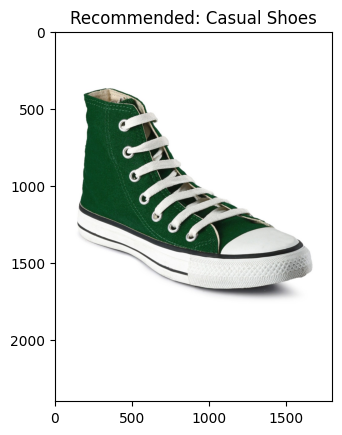

id                                                               17788
articleType                                                      Socks
subCategory                                                      Socks
gender                                                             Men
masterCategory                                             Accessories
filename                                                     17788.jpg
complementary_items    [Sports Shoes, Track Pants, Tshirts, Backpacks]
Name: 18335, dtype: object


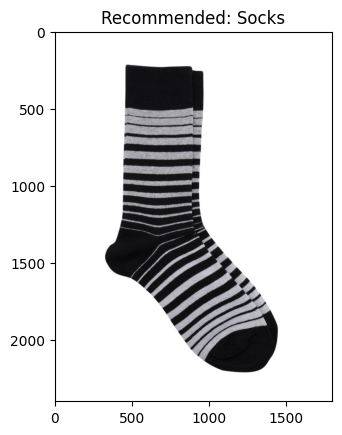

id                                                               31986
articleType                                                      Socks
subCategory                                                      Socks
gender                                                             Men
masterCategory                                             Accessories
filename                                                     31986.jpg
complementary_items    [Sports Shoes, Track Pants, Tshirts, Backpacks]
Name: 23579, dtype: object


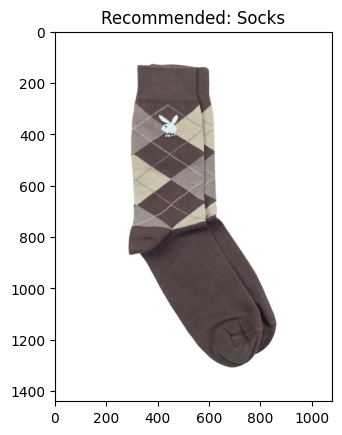

id                                               10328
articleType                                    Watches
subCategory                                    Watches
gender                                             Men
masterCategory                             Accessories
filename                                     10328.jpg
complementary_items    [Shirts, Jeans, Tshirts, Shoes]
Name: 30555, dtype: object


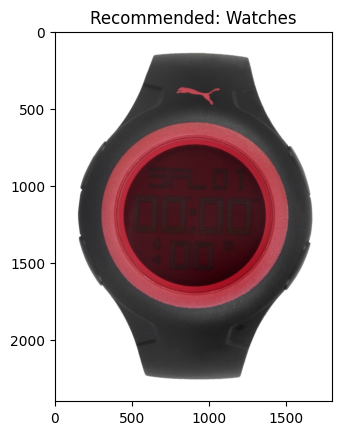

id                                                       23165
articleType                                            Tshirts
subCategory                                            Topwear
gender                                                     Men
masterCategory                                         Apparel
filename                                             23165.jpg
complementary_items    [Jeans, Belts, Casual Shoes, Backpacks]
Name: 32594, dtype: object


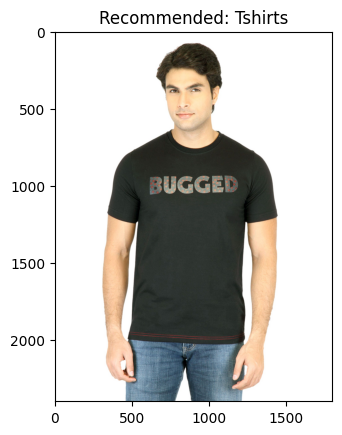

In [ ]:
# Get top N recommendations for a user
def get_recommendations(user_id, num_recommendations=5):
    # Get the top N items that the user has interacted with (or rated highly)
    user_ratings = predicted_df.loc[user_id].sort_values(ascending=False)
    recommendations = user_ratings.index[:num_recommendations]

    # Gather details for recommended items and complementary items
    recommended_items = data[data['id'].isin(recommendations)][['id', 'articleType', 'subCategory', 'gender', 'masterCategory', 'filename']]
    recommended_items = recommended_items.drop_duplicates('id')

    # Add complementary items as a new column
    recommended_items['complementary_items'] = recommended_items['articleType'].apply(
        lambda article_type: complementary_mapping.get(article_type, [])
    )

    return recommended_items

# Function to display input details along with recommendations
def display_recommendations(user_id, num_recommendations=5):
    # Get the top N recommended items for the user
    recommendations = get_recommendations(user_id, num_recommendations)

    # Display information for the input item(s) the user has interacted with
    input_items = predicted_df.loc[user_id].sort_values(ascending=False).index[:num_recommendations]

    print("Input Items (User's Interacted Items):")
    input_items_details = data[data['id'].isin(input_items)][['id', 'articleType', 'subCategory', 'gender', 'masterCategory', 'filename']]
    for _, item in input_items_details.iterrows():
        print(item[['id', 'articleType', 'subCategory', 'gender', 'masterCategory', 'filename']])

    print("\nRecommended Items:")
    for _, item in recommendations.iterrows():
        # Print item details and complementary items
        print(item[['id', 'articleType', 'subCategory', 'gender', 'masterCategory', 'filename', 'complementary_items']])

        # Optionally, display the item images if you want to show them visually
        img = mpimg.imread(os.path.join(image_folder_path, item['filename']))
        plt.imshow(img)
        # plt.axis('off')
        plt.title(f"Recommended: {item['articleType']}")
        plt.show()

# Example usage for a user ID
user_id = 93810  # Replace with an actual user ID
display_recommendations(user_id)


Input Items (User's Interacted Items):
ID: 20896, Article Type: Casual Shoes, SubCategory: Shoes, Gender: Men, Master Category: Footwear, Filename: 20896.jpg
ID: 17788, Article Type: Socks, SubCategory: Socks, Gender: Men, Master Category: Accessories, Filename: 17788.jpg
ID: 31986, Article Type: Socks, SubCategory: Socks, Gender: Men, Master Category: Accessories, Filename: 31986.jpg
ID: 10328, Article Type: Watches, SubCategory: Watches, Gender: Men, Master Category: Accessories, Filename: 10328.jpg
ID: 23165, Article Type: Tshirts, SubCategory: Topwear, Gender: Men, Master Category: Apparel, Filename: 23165.jpg

Recommended Items:
ID: 20896, Article Type: Casual Shoes, SubCategory: Shoes, Gender: Men, Master Category: Footwear, Filename: 20896.jpg
Complementary Items: ['Jeans', 'Tshirts', 'Belts', 'Backpacks']


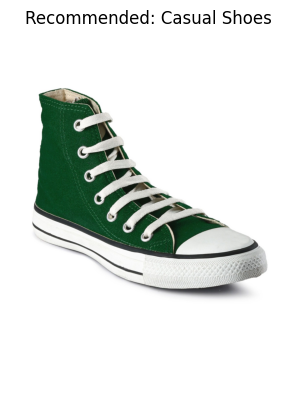

ID: 17788, Article Type: Socks, SubCategory: Socks, Gender: Men, Master Category: Accessories, Filename: 17788.jpg
Complementary Items: ['Sports Shoes', 'Track Pants', 'Tshirts', 'Backpacks']


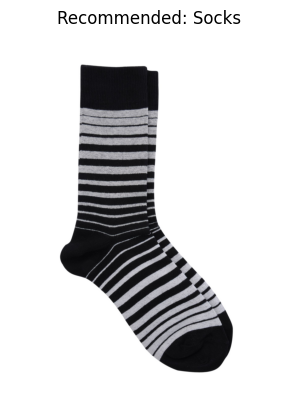

ID: 31986, Article Type: Socks, SubCategory: Socks, Gender: Men, Master Category: Accessories, Filename: 31986.jpg
Complementary Items: ['Sports Shoes', 'Track Pants', 'Tshirts', 'Backpacks']


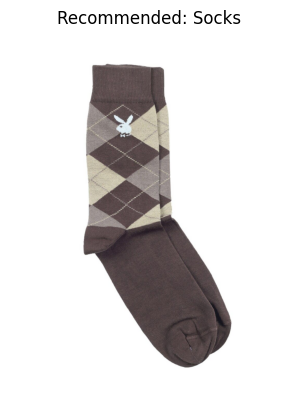

ID: 10328, Article Type: Watches, SubCategory: Watches, Gender: Men, Master Category: Accessories, Filename: 10328.jpg
Complementary Items: ['Shirts', 'Jeans', 'Tshirts', 'Shoes']


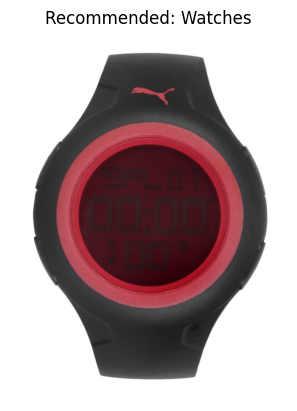

ID: 23165, Article Type: Tshirts, SubCategory: Topwear, Gender: Men, Master Category: Apparel, Filename: 23165.jpg
Complementary Items: ['Jeans', 'Belts', 'Casual Shoes', 'Backpacks']


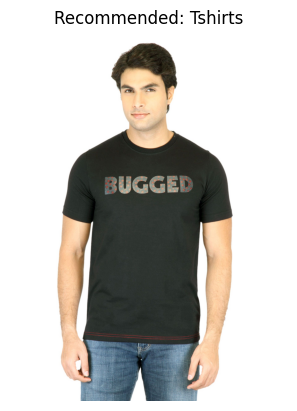

In [ ]:
# Get top N recommendations for a user
def get_recommendations(user_id, num_recommendations=5):
    # Get the top N items that the user has interacted with (or rated highly)
    user_ratings = predicted_df.loc[user_id].sort_values(ascending=False)
    recommendations = user_ratings.index[:num_recommendations]

    # Gather details for recommended items and complementary items
    recommended_items = data[data['id'].isin(recommendations)][['id', 'articleType', 'subCategory', 'gender', 'masterCategory', 'filename']]
    recommended_items = recommended_items.drop_duplicates('id')

    # Add complementary items as a new column
    recommended_items['complementary_items'] = recommended_items['articleType'].apply(
        lambda article_type: complementary_mapping.get(article_type, [])
    )

    return recommended_items

# Function to display input details along with recommendations
def display_recommendations(user_id, num_recommendations=5):
    # Get the top N recommended items for the user
    recommendations = get_recommendations(user_id, num_recommendations)

    # Display information for the input item(s) the user has interacted with
    input_items = predicted_df.loc[user_id].sort_values(ascending=False).index[:num_recommendations]

    print("Input Items (User's Interacted Items):")
    input_items_details = data[data['id'].isin(input_items)][['id', 'articleType', 'subCategory', 'gender', 'masterCategory', 'filename']]
    for _, item in input_items_details.iterrows():
        print(f"ID: {item['id']}, Article Type: {item['articleType']}, SubCategory: {item['subCategory']}, Gender: {item['gender']}, Master Category: {item['masterCategory']}, Filename: {item['filename']}")

    print("\nRecommended Items:")
    for _, item in recommendations.iterrows():
        # Print item details and complementary items
        print(f"ID: {item['id']}, Article Type: {item['articleType']}, SubCategory: {item['subCategory']}, Gender: {item['gender']}, Master Category: {item['masterCategory']}, Filename: {item['filename']}")
        print(f"Complementary Items: {item['complementary_items']}")

        # Optionally, display the item images if you want to show them visually
        img = mpimg.imread(os.path.join(image_folder_path, item['filename']))
        plt.imshow(img)
        plt.title(f"Recommended: {item['articleType']}")
        plt.axis('off')
        plt.show()

# Example usage for a user ID
user_id = 93810  # Replace with an actual user ID
display_recommendations(user_id)


Input Items (User's Interacted Items):
ID: 9394, Article Type: Sports Shoes, SubCategory: Shoes, Gender: Women, Master Category: Footwear, Filename: 9394.jpg
ID: 13376, Article Type: Casual Shoes, SubCategory: Shoes, Gender: Women, Master Category: Footwear, Filename: 13376.jpg
ID: 6249, Article Type: Tshirts, SubCategory: Topwear, Gender: Women, Master Category: Apparel, Filename: 6249.jpg
ID: 42996, Article Type: Sports Shoes, SubCategory: Shoes, Gender: Women, Master Category: Footwear, Filename: 42996.jpg
ID: 42844, Article Type: Handbags, SubCategory: Bags, Gender: Women, Master Category: Accessories, Filename: 42844.jpg

Recommended Items:
ID: 9394, Article Type: Sports Shoes, SubCategory: Shoes, Gender: Women, Master Category: Footwear, Filename: 9394.jpg
Complementary Items: ['Track Pants', 'Tshirts', 'Watches', 'Backpacks']


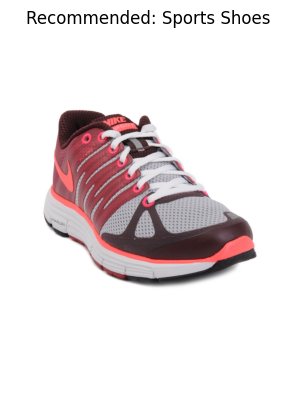

ID: 13376, Article Type: Casual Shoes, SubCategory: Shoes, Gender: Women, Master Category: Footwear, Filename: 13376.jpg
Complementary Items: ['Jeans', 'Tshirts', 'Belts', 'Backpacks']


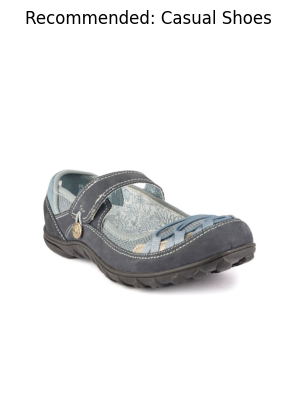

ID: 6249, Article Type: Tshirts, SubCategory: Topwear, Gender: Women, Master Category: Apparel, Filename: 6249.jpg
Complementary Items: ['Jeans', 'Belts', 'Casual Shoes', 'Backpacks']


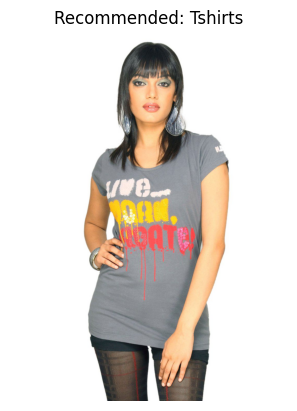

ID: 42996, Article Type: Sports Shoes, SubCategory: Shoes, Gender: Women, Master Category: Footwear, Filename: 42996.jpg
Complementary Items: ['Track Pants', 'Tshirts', 'Watches', 'Backpacks']


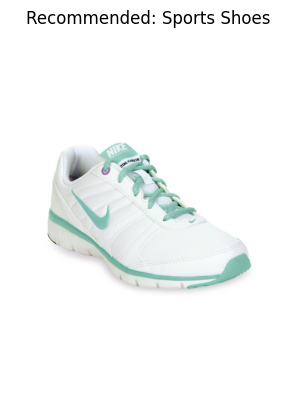

ID: 42844, Article Type: Handbags, SubCategory: Bags, Gender: Women, Master Category: Accessories, Filename: 42844.jpg
Complementary Items: ['Tshirts', 'Jeans', 'Watches', 'Heels']


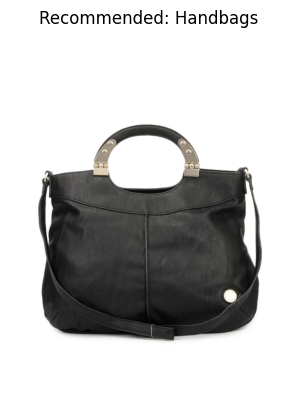

In [ ]:
# Get top N recommendations for a user
def get_recommendations(user_id, num_recommendations=5):
    # Get the top N items that the user has interacted with (or rated highly)
    user_ratings = predicted_df.loc[user_id].sort_values(ascending=False)
    recommendations = user_ratings.index[:num_recommendations]

    # Gather details for recommended items and complementary items
    recommended_items = data[data['id'].isin(recommendations)][['id', 'articleType', 'subCategory', 'gender', 'masterCategory', 'filename']]
    recommended_items = recommended_items.drop_duplicates('id')

    # Add complementary items as a new column
    recommended_items['complementary_items'] = recommended_items['articleType'].apply(
        lambda article_type: complementary_mapping.get(article_type, [])
    )

    return recommended_items

# Function to display input details along with recommendations
def display_recommendations(user_id, num_recommendations=5):
    # Get the top N recommended items for the user
    recommendations = get_recommendations(user_id, num_recommendations)

    # Display information for the input item(s) the user has interacted with
    input_items = predicted_df.loc[user_id].sort_values(ascending=False).index[:num_recommendations]

    print("Input Items (User's Interacted Items):")
    input_items_details = data[data['id'].isin(input_items)][['id', 'articleType', 'subCategory', 'gender', 'masterCategory', 'filename']]
    for _, item in input_items_details.iterrows():
        print(f"ID: {item['id']}, Article Type: {item['articleType']}, SubCategory: {item['subCategory']}, Gender: {item['gender']}, Master Category: {item['masterCategory']}, Filename: {item['filename']}")

    print("\nRecommended Items:")
    for _, item in recommendations.iterrows():
        # Print item details and complementary items
        print(f"ID: {item['id']}, Article Type: {item['articleType']}, SubCategory: {item['subCategory']}, Gender: {item['gender']}, Master Category: {item['masterCategory']}, Filename: {item['filename']}")
        print(f"Complementary Items: {item['complementary_items']}")

        # Optionally, display the item images if you want to show them visually
        img = mpimg.imread(os.path.join(image_folder_path, item['filename']))
        plt.imshow(img)
        plt.title(f"Recommended: {item['articleType']}")
        plt.axis('off')
        plt.show()

# Example usage for a user ID
user_id = 65302  # Replace with an actual user ID
display_recommendations(user_id)


Input Items (User's Interacted Items):
ID: 24106, Article Type: Flip Flops, SubCategory: Flip Flops, Gender: Men, Master Category: Footwear, Filename: 24106.jpg
ID: 39340, Article Type: Sports Shoes, SubCategory: Shoes, Gender: Men, Master Category: Footwear, Filename: 39340.jpg
ID: 28411, Article Type: Sunglasses, SubCategory: Eyewear, Gender: Men, Master Category: Accessories, Filename: 28411.jpg
ID: 13327, Article Type: Shirts, SubCategory: Topwear, Gender: Men, Master Category: Apparel, Filename: 13327.jpg
ID: 34395, Article Type: Tshirts, SubCategory: Topwear, Gender: Men, Master Category: Apparel, Filename: 34395.jpg

Recommended Items:
ID: 24106, Article Type: Flip Flops, SubCategory: Flip Flops, Gender: Men, Master Category: Footwear, Filename: 24106.jpg
Complementary Items: ['Shorts', 'Tshirts', 'Sunglasses']


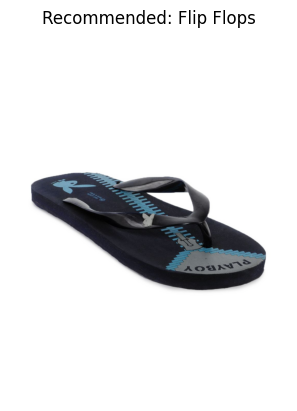

ID: 39340, Article Type: Sports Shoes, SubCategory: Shoes, Gender: Men, Master Category: Footwear, Filename: 39340.jpg
Complementary Items: ['Track Pants', 'Tshirts', 'Watches', 'Backpacks']


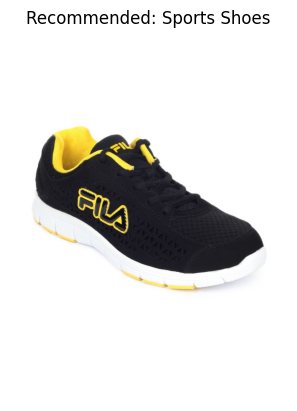

ID: 28411, Article Type: Sunglasses, SubCategory: Eyewear, Gender: Men, Master Category: Accessories, Filename: 28411.jpg
Complementary Items: ['Tshirts', 'Jeans', 'Casual Shoes', 'Backpacks']


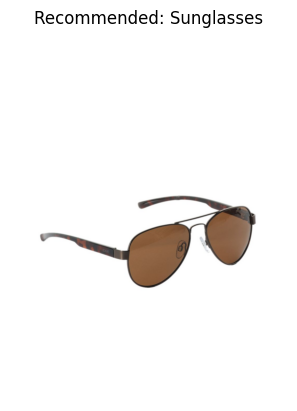

ID: 13327, Article Type: Shirts, SubCategory: Topwear, Gender: Men, Master Category: Apparel, Filename: 13327.jpg
Complementary Items: ['Trousers', 'Formal Shoes', 'Belts', 'Watches']


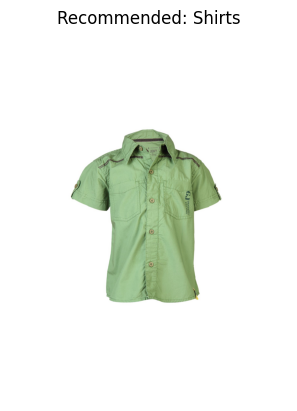

ID: 34395, Article Type: Tshirts, SubCategory: Topwear, Gender: Men, Master Category: Apparel, Filename: 34395.jpg
Complementary Items: ['Jeans', 'Belts', 'Casual Shoes', 'Backpacks']


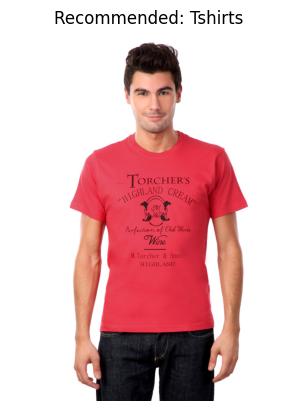

In [ ]:
# Example usage for a user ID
user_id = 36062  # Replace with an actual user ID
display_recommendations(user_id)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load Dataset
data = pd.read_csv('Final Fashion Dataset.csv')

# Prepare the Utility Matrix
num_users = data['user_id'].nunique()
num_items = data['id'].nunique()

# Create a matrix of zeros for users and items
user_item_matrix = np.zeros((num_users, num_items))

# Populate the matrix with known ratings
for row in data.itertuples():
    user_item_matrix[row.user_id, row.id] = row.ratings

# PMF parameters
num_features = 10    # Number of latent features
alpha = 0.01         # Learning rate
lambda_reg = 0.1     # Regularization parameter
num_epochs = 1000    # Number of iterations

# Initialize user and item latent feature matrices with random values
user_features = np.random.normal(scale=1./num_features, size=(num_users, num_features))
item_features = np.random.normal(scale=1./num_features, size=(num_items, num_features))

# Gradient Descent for Matrix Factorization
for epoch in range(num_epochs):
    for i in range(num_users):
        for j in range(num_items):
            # Only consider known ratings
            if user_item_matrix[i, j] > 0:
                # Calculate prediction and error
                prediction = np.dot(user_features[i, :], item_features[j, :].T)
                error = user_item_matrix[i, j] - prediction

                # Update user and item latent features based on error
                user_features[i, :] += alpha * (error * item_features[j, :] - lambda_reg * user_features[i, :])
                item_features[j, :] += alpha * (error * user_features[i, :] - lambda_reg * item_features[j, :])

    # Calculate MSE loss for monitoring
    mse = 0
    count = 0
    for i in range(num_users):
        for j in range(num_items):
            if user_item_matrix[i, j] > 0:
                prediction = np.dot(user_features[i, :], item_features[j, :].T)
                mse += (user_item_matrix[i, j] - prediction) ** 2
                count += 1
    mse /= count
    print(f'Epoch {epoch + 1}, MSE: {mse}')

# Recommendation Function
def recommend_items(user_id, num_recommendations=5):
    # Calculate predicted ratings
    user_ratings = np.dot(user_features[user_id], item_features.T)

    # Exclude items already rated by the user
    rated_items = np.where(user_item_matrix[user_id] > 0)[0]
    user_ratings[rated_items] = -np.inf  # Set high-rated items to -inf to exclude

    # Get indices of the highest predicted ratings
    recommended_item_ids = np.argsort(-user_ratings)[:num_recommendations]
    return recommended_item_ids

# Display Recommendations with Images
def display_recommendations(user_id, recommendations):
    for item_id in recommendations:
        item_data = data[data['item_id'] == item_id].iloc[0]

        # Display item image and details
        print(f"Recommended Item: {item_data['articleType']}")
        print(f"Predicted Rating: {np.dot(user_features[user_id], item_features[item_id])}")

        # Assuming 'image_path' column has file paths for each image
        img = plt.imread(item_data['image_path'])
        plt.imshow(img)
        plt.title(item_data['articleType'])
        plt.axis('off')
        plt.show()

# Example Usage
user_id = 1 # Example user
recommended_items = recommend_items(user_id)
display_recommendations(user_id, recommended_items)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load Dataset
data = pd.read_csv('Final Fashion Dataset.csv')

# Map 'user_id' and 'id' to a new index
user_mapping = {user_id: i for i, user_id in enumerate(data['user_id'].unique())}
item_mapping = {item_id: i for i, item_id in enumerate(data['id'].unique())}

# Update the dataset with new indices for user_id and item_id
data['user_index'] = data['user_id'].map(user_mapping)
data['item_index'] = data['id'].map(item_mapping)

# Prepare the Utility Matrix with mapped indices
num_users = len(user_mapping)
num_items = len(item_mapping)
user_item_matrix = np.zeros((num_users, num_items))

# Populate the matrix with known ratings
for row in data.itertuples():
    user_item_matrix[row.user_index, row.item_index] = row.ratings

# PMF parameters
num_features = 10    # Number of latent features
alpha = 0.01         # Learning rate
lambda_reg = 0.1     # Regularization parameter
num_epochs = 1000    # Number of iterations

# Initialize user and item latent feature matrices with random values
user_features = np.random.normal(scale=1./num_features, size=(num_users, num_features))
item_features = np.random.normal(scale=1./num_features, size=(num_items, num_features))

# Gradient Descent for Matrix Factorization
for epoch in range(num_epochs):
    for i in range(num_users):
        for j in range(num_items):
            # Only consider known ratings
            if user_item_matrix[i, j] > 0:
                # Calculate prediction and error
                prediction = np.dot(user_features[i, :], item_features[j, :].T)
                error = user_item_matrix[i, j] - prediction

                # Update user and item latent features based on error
                user_features[i, :] += alpha * (error * item_features[j, :] - lambda_reg * user_features[i, :])
                item_features[j, :] += alpha * (error * user_features[i, :] - lambda_reg * item_features[j, :])

    # Calculate MSE loss for monitoring
    mse = 0
    count = 0
    for i in range(num_users):
        for j in range(num_items):
            if user_item_matrix[i, j] > 0:
                prediction = np.dot(user_features[i, :], item_features[j, :].T)
                mse += (user_item_matrix[i, j] - prediction) ** 2
                count += 1
    mse /= count
    print(f'Epoch {epoch + 1}, MSE: {mse}')

# Recommendation Function
def recommend_items(user_id, num_recommendations=5):
    # Calculate predicted ratings
    user_index = user_mapping[user_id]
    user_ratings = np.dot(user_features[user_index], item_features.T)

    # Exclude items already rated by the user
    rated_items = np.where(user_item_matrix[user_index] > 0)[0]
    user_ratings[rated_items] = -np.inf  # Set high-rated items to -inf to exclude

    # Get indices of the highest predicted ratings
    recommended_item_indices = np.argsort(-user_ratings)[:num_recommendations]
    recommended_item_ids = [list(item_mapping.keys())[list(item_mapping.values()).index(idx)] for idx in recommended_item_indices]
    return recommended_item_ids

# Display Recommendations with Images
def display_recommendations(user_id, recommendations):
    for item_id in recommendations:
        item_data = data[data['id'] == item_id].iloc[0]

        # Display item image and details
        print(f"Recommended Item: {item_data['articleType']}")
        print(f"Predicted Rating: {np.dot(user_features[user_mapping[user_id]], item_features[item_mapping[item_id]])}")

        # Assuming 'image_path' column has file paths for each image
        img = plt.imread(item_data['image_path'])
        plt.imshow(img)
        plt.title(item_data['articleType'])
        plt.axis('off')
        plt.show()

# Example Usage
user_id = 1 # Example user
recommended_items = recommend_items(user_id)
display_recommendations(user_id, recommended_items)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import svds

# Load Dataset
data = pd.read_csv('Final Fashion Dataset.csv')

# Map 'user_id' and 'id' to a new index
user_mapping = {user_id: i for i, user_id in enumerate(data['user_id'].unique())}
item_mapping = {item_id: i for i, item_id in enumerate(data['id'].unique())}

# Update the dataset with new indices for user_id and item_id
data['user_index'] = data['user_id'].map(user_mapping)
data['item_index'] = data['id'].map(item_mapping)

# Prepare the Utility Matrix with mapped indices
num_users = len(user_mapping)
num_items = len(item_mapping)

# Ensure ratings are of float type
# The original code might have loaded ratings with an integer type
data['ratings'] = data['ratings'].astype(float)

# Create the user-item matrix with float data type
user_item_matrix = csr_matrix((data['ratings'], (data['user_index'], data['item_index'])),
                              shape=(num_users, num_items), dtype=np.float64)

# Apply SVD to decompose the user-item matrix
k = 10  # Number of latent features
u, sigma, vt = svds(user_item_matrix, k=k)
sigma = np.diag(sigma)

# Reconstruct predictions for each user-item pair
predicted_ratings = np.dot(np.dot(u, sigma), vt)

In [ ]:
# Path to the image folder in Google Drive
image_folder_path = '/content/drive/MyDrive/Images'

Input Item Details:
Article Type: Skirts
SubCategory: Bottomwear
Base Colour: Black


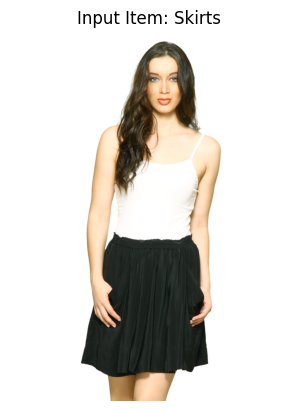


Recommended Items:
Recommended Item: Tshirts
Predicted Rating: 2.5849009112515544e-17


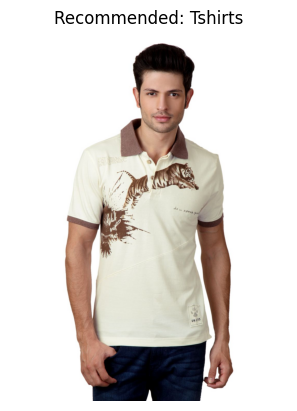

Recommended Item: Tshirts
Predicted Rating: 2.5849009112515544e-17


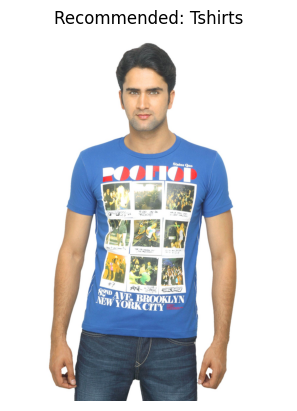

In [ ]:
import matplotlib.pyplot as plt
import os

# Path to the image folder in Google Drive
image_folder_path = '/content/drive/MyDrive/Images'

# Display Recommendations with Input Item Details and Images
def display_recommendations(user_id, recommendations):
    # Display input item details
    input_item_data = data[data['user_id'] == user_id].iloc[0]
    print("Input Item Details:")
    print(f"Article Type: {input_item_data['articleType']}")
    print(f"SubCategory: {input_item_data['subCategory']}")
    print(f"Base Colour: {input_item_data['baseColour']}")

    # Construct the full path to the image file for the input item
    input_image_filename = f"{input_item_data['id']}.jpg"
    input_image_path = os.path.join(image_folder_path, input_image_filename)

    # Check if the input image file exists and display it
    if os.path.exists(input_image_path):
        img = plt.imread(input_image_path)
        plt.imshow(img)
        plt.title(f"Input Item: {input_item_data['articleType']}")
        plt.axis('off')
        plt.show()
    else:
        print(f"Input item image not found at {input_image_path}")

    # Display recommended items
    print("\nRecommended Items:")
    for item_id in recommendations:
        item_data = data[data['id'] == item_id].iloc[0]

        # Display recommended item details
        print(f"Recommended Item: {item_data['articleType']}")
        print(f"Predicted Rating: {predicted_ratings[user_mapping[user_id], item_mapping[item_id]]}")

        # Construct the full path to the image file for the recommended item
        image_filename = f"{item_id}.jpg"
        image_path = os.path.join(image_folder_path, image_filename)

        # Check if the image file exists and display it
        if os.path.exists(image_path):
            img = plt.imread(image_path)
            plt.imshow(img)
            plt.title(f"Recommended: {item_data['articleType']}")
            plt.axis('off')
            plt.show()
        else:
            print(f"Image for {item_data['articleType']} with ID {item_id} not found at {image_path}")

# Example Usage
user_id = 93810  # Example user
recommended_items = recommend_items(user_id)
display_recommendations(user_id, recommended_items)
